## Handling Outliers Pt.2

In [1]:
import pandas as pd
wdi_imp = pd.read_pickle('wdi_imp.pkl')

In [2]:
## Carryin on from Lab 27 I will reload any changes made to the df below
wdi_imp = wdi_imp[wdi_imp['is_region'] == 0]

In [3]:
wdi_imp.shape

(342, 19)

<Axes: >

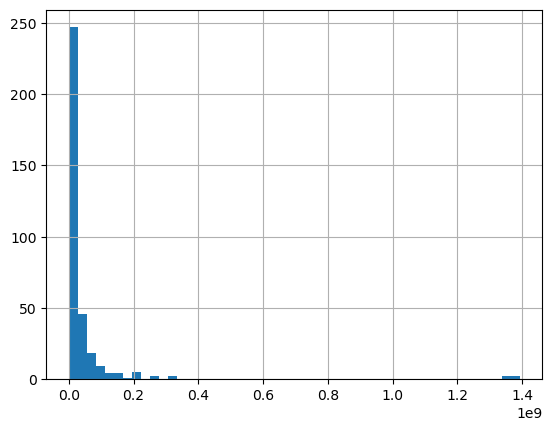

In [4]:
# The data is still scewed but there is far less data in the middle meaning a large number of outliers were handled.
## We know that the largest population listed that appears to be an outlier is china at 1.4 billion population
# Thus making it not an outlier
# See below to confirm
wdi_imp['population'].hist(bins = 50)

In [5]:
wdi_imp[['country_name','population']].sort_values(by='population', ascending = False)

,country_name,population
253,China,1.392730e+09
36,China,1.386395e+09
308,India,1.352617e+09
91,India,1.338659e+09
424,United States,3.266875e+08
...,...,...
185,St. Lucia,1.809550e+05
403,St. Vincent and the Grenadines,1.102100e+05
186,St. Vincent and the Grenadines,1.098270e+05
416,Tonga,1.031970e+05


## Boxplots
#### Built on the 5 number summary, min, Q1(25%), Q2(median), Q3(75%), max
#### Interquartile Range (IQR) = Q3 - Q1

<Axes: >

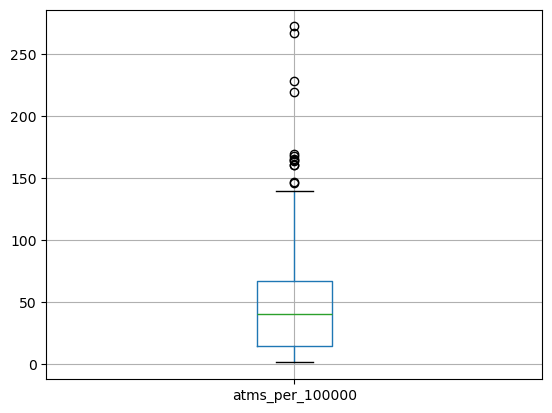

In [6]:
## To see Q1, Median, and Q3 on the plot look at the box.
# The bottom of the box, not the lower flat line(wisker) below the box, is Q1(25%)
# The green line in the middle of the box is the median
# The top of the box, not the upper flat(wisker) line above the box, is Q3 (75%)
# The flat lines above and below the box are the wiskers. wisker above = Q3 + 1.5 * IQR wisker ||| wisker below = Q1 - 1.5 * IQR 
# The seperaated dots are picked up by the function as outliers that fall outside the wiskers 
wdi_imp.boxplot('atms_per_100000')

### Lets calculate Q1 and Q3

In [10]:
## There is no percentile or quaritle methods in pandas so use quantile method
Q1 = wdi_imp['atms_per_100000'].quantile(0.25)

In [11]:
Q3 = wdi_imp['atms_per_100000'].quantile(0.75)

In [12]:
print(Q1)
print(Q3)

14.294336446341672
66.92085678105676


In [16]:
## Check to see if matches describe method 25% and 75%
wdi_imp['atms_per_100000'].describe()

count    342.000000
mean      49.059720
std       43.925416
min        1.213235
25%       14.294336
50%       40.663241
75%       66.920857
max      272.592801
Name: atms_per_100000, dtype: float64

## Calculate IQR

In [17]:
IQR = Q3 - Q1

In [18]:
IQR

52.62652033471508

In [19]:
outlire_high = Q3+1.5*IQR
outlier_low = Q1-1.5*IQR

In [21]:
# So anything above the high or below the low are considered outliers
print(outlire_high)
print(outlier_low)

145.8606372831294
-64.64544405573095


### Lets Get Just The Outliers

In [35]:
outlier_mask = (wdi_imp['atms_per_100000'] > outlire_high) | (wdi_imp['atms_per_100000'] < outlier_low)

In [36]:
# These appeara to be legitimate outliers due to the countries present. Like canada and australia who could plausably have that many atms per 100000
wdi_imp[outlier_mask]

,country_name,access_to_electricity_pct,atms_per_100000,compulsory_education_years,health_expenditure_pct_of_gdp,gdp_per_capita_usd,gdp_per_capita_ppp,life_expectancy_female,life_expectancy_male,life_expectancy,population_density,population,alcohol_consumption_per_capita,unemployment_rate_female,unemployment_rate_male,unemployment_rate,year,country_category,is_region
7,Australia,100.0,160.324387,10.0,9.205448,54027.966818,48870.588287,84.60,80.50,82.500000,3.198361,24601860.0,10.007826,5.668,5.525,5.591,2017.0,DEVELOPED,0.0
8,Austria,100.0,165.036774,13.0,10.382624,47426.511960,54496.163694,84.00,79.40,81.643902,106.607445,8797566.0,10.297808,5.031,5.908,5.499,2017.0,DEVELOPED,0.0
30,Canada,100.0,228.429181,10.0,10.789648,45148.552706,48633.829775,84.10,79.90,81.948780,4.018616,36543321.0,10.781087,5.849,6.780,6.340,2017.0,DEVELOPED,0.0
103,"Korea, Rep.",100.0,272.592801,9.0,7.106949,31616.843400,41001.066886,85.70,79.70,82.626829,526.848249,51361911.0,9.738237,3.584,3.783,3.700,2017.0,DEVELOPING,0.0
162,Portugal,100.0,167.994557,12.0,9.330050,21490.429863,33086.096774,84.60,78.40,81.424390,112.441821,10300300.0,9.344204,9.349,8.406,8.867,2017.0,DEVELOPED,0.0
167,Russian Federation,100.0,164.039818,11.0,5.343881,10720.332585,26005.979940,77.60,67.51,72.431951,8.823221,144496740.0,9.748107,5.051,5.364,5.212,2017.0,DEVELOPING,0.0
224,Australia,100.0,146.116748,10.0,9.284598,57354.964046,50999.988362,84.90,80.70,82.748780,3.247871,24982688.0,10.510000,5.318,5.281,5.298,2018.0,DEVELOPED,0.0
225,Austria,100.0,169.405219,13.0,10.325599,51478.285262,56819.598355,84.10,79.40,81.692683,107.127967,8840521.0,11.960000,4.650,5.020,4.848,2018.0,DEVELOPED,0.0
247,Canada,100.0,220.007919,10.0,10.790469,46313.171371,50077.796236,84.10,79.90,81.948780,4.075188,37057765.0,8.940000,5.492,6.136,5.831,2018.0,DEVELOPED,0.0
260,Croatia,100.0,147.312238,8.0,6.827024,15014.085019,28215.247954,81.40,74.90,78.070732,73.049375,4087843.0,9.230000,9.340,7.644,8.432,2018.0,NaN,0.0


<Axes: >

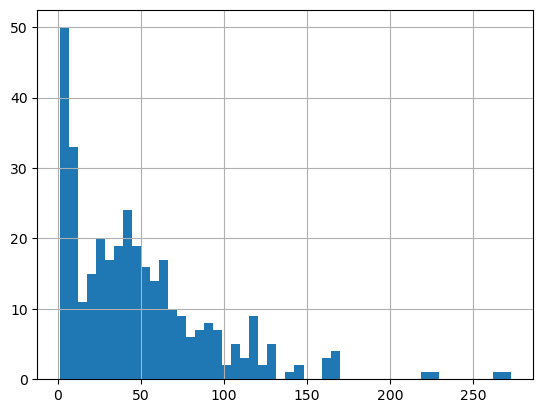

In [37]:
## By the outlire_high of 145 everything above that is an outlier
# Since we determined that some of the outliers maybe legit we will look at the 99th percentile
wdi_imp['atms_per_100000'].hist(bins = 50)

## Calculating 99th Percentile

In [38]:
p99 = wdi_imp['atms_per_100000'].quantile(0.99)

In [39]:
# So everything above 199 is in the 99th percentile
p99

199.26081239849262

In [40]:
outlier_mask_2 = wdi_imp['atms_per_100000'] > p99

In [45]:
## Lets assign p99 to the outliers
# Use loc to do this
wdi_imp.loc[wdi_imp['atms_per_100000'] > p99, 'atms_per_100000' ]=p99

<Axes: >

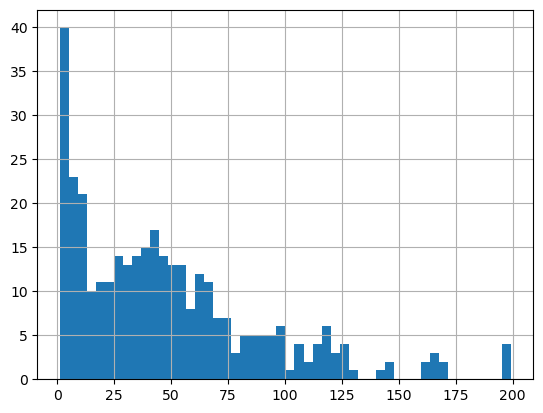

In [46]:
wdi_imp['atms_per_100000'].hist(bins = 50)

## Now lets look at population_density column

<Axes: >

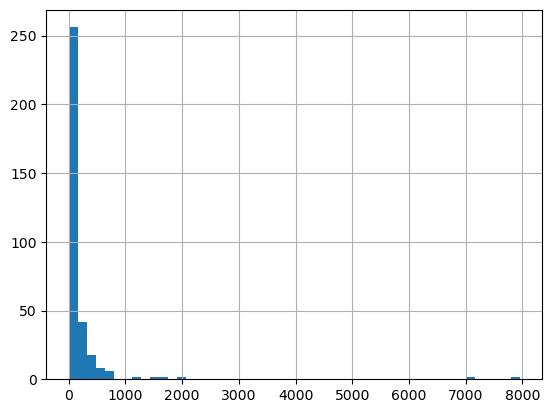

In [48]:
wdi_imp['population_density'].hist(bins=50)

In [50]:
# Checking the values above 7000 which seem to be outliers
# Looking at which countries they are we notice it is Hong Kong and Singapore, both high density places
# Meaning they are likley true outliers and not an error
wdi_imp[wdi_imp['population_density']>=7000]

,country_name,access_to_electricity_pct,atms_per_100000,compulsory_education_years,health_expenditure_pct_of_gdp,gdp_per_capita_usd,gdp_per_capita_ppp,life_expectancy_female,life_expectancy_male,life_expectancy,population_density,population,alcohol_consumption_per_capita,unemployment_rate_female,unemployment_rate_male,unemployment_rate,year,country_category,is_region
83,"Hong Kong SAR, China",100.0,50.431834,9.0,6.923412,46165.856512,59849.248176,87.6,81.9,84.680488,7039.714286,7391700.0,2.013658,2.774,3.395,3.090,2017.0,DEVELOPING,0.0
175,Singapore,100.0,63.103085,6.0,4.417787,60913.745333,94940.970785,85.4,80.9,83.095122,7915.730436,5612253.0,1.801258,4.436,4.032,4.200,2017.0,NaN,0.0
300,"Hong Kong SAR, China",100.0,51.795601,9.0,6.971941,48543.400991,62551.058589,87.7,82.3,84.934146,7096.190476,7451000.0,1.964083,2.616,3.181,2.903,2018.0,DEVELOPING,0.0
392,Singapore,100.0,64.593175,6.0,4.464447,66188.779396,100126.023554,85.4,81.0,83.146341,7952.998418,5638676.0,2.030000,4.255,3.849,4.019,2018.0,NaN,0.0
